# Time series graphs of YoY% Change of HPI versus implied Turnover
## YoY = Year over Year
## Implied turnover = EHS/(Stocks/1000)

In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Import the data that shows the total home sales per month in millions in the US beginning January 1999.
#Look at the data

HomeSales = pd.read_csv('./Existing_Home_Sales.csv')
print(HomeSales.info())
HomeSales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EOM     282 non-null    object 
 1   EHS     282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None


,EOM,EHS
0,1/31/99,5.23
1,2/28/99,5.10
2,3/31/99,5.15
3,4/30/99,5.08
4,5/31/99,5.19


In [80]:
#Convert the EHS column to datetime

HomeSales['EOM'] = pd.to_datetime(HomeSales['EOM'])

In [81]:
# Rename the EOM column to Date

HomeSales['Date'] = HomeSales['EOM']

In [82]:
# Delete the old column claled EOM

HomeSales.drop('EOM', inplace=True, axis=1)

In [83]:
# Make new columns for the year, month

HomeSales["Month"] = pd.to_datetime(HomeSales['Date']).dt.month
HomeSales["Year"] = pd.to_datetime(HomeSales['Date']).dt.year

In [84]:
# Make a new column for the quarter:

HomeSales["Q"] = np.ceil(HomeSales["Month"]/3)

In [85]:
#Look at how recent the data is

HomeSales.tail()

,EHS,Date,Month,Year,Q
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0
279,5.60,2022-04-30,4,2022,2.0
280,5.41,2022-05-31,5,2022,2.0
281,5.40,2022-06-30,6,2022,2.0


In [86]:
# The data that we have for the stocks ends in 2022 Q1, so let's truncate the 2022 Q2 data:

HomeSales = HomeSales.drop(labels=[279,280,281], axis=0)
HomeSales.tail()

,EHS,Date,Month,Year,Q
274,6.33,2021-11-30,11,2021,4.0
275,6.09,2021-12-31,12,2021,4.0
276,6.49,2022-01-31,1,2022,1.0
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0


In [87]:
# Now import the Quarterly stock data
#Then look at only the colum HS_US

StockQuarterly = pd.read_csv('./Stock_Quarterly.csv')
StockQuarterly = StockQuarterly[['Year', 'Quarter', 'Practical_Stock']]
print(StockQuarterly.info())
StockQuarterly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             93 non-null     int64
 1   Quarter          93 non-null     int64
 2   Practical_Stock  93 non-null     int64
dtypes: int64(3)
memory usage: 2.3 KB
None


,Year,Quarter,Practical_Stock
0,1999,1,79655
1,1999,2,80146
2,1999,3,80656
3,1999,4,80094
4,2000,1,80776


In [88]:
# Now we would like to get the aggregate Housing sales in each quarter and then add them to StockQuarterly:
#First we make a list that we will add

HomeSalesQuarterly_list = HomeSales.groupby(['Year', 'Q']).mean()['EHS'].tolist()

In [89]:
print(HomeSales.head(15))
print(HomeSales.tail(15))
HomeSalesQuarterly_list

     EHS       Date  Month  Year    Q
0   5.23 1999-01-31      1  1999  1.0
1   5.10 1999-02-28      2  1999  1.0
2   5.15 1999-03-31      3  1999  1.0
3   5.08 1999-04-30      4  1999  2.0
4   5.19 1999-05-31      5  1999  2.0
5   5.43 1999-06-30      6  1999  2.0
6   5.25 1999-07-31      7  1999  3.0
7   5.23 1999-08-31      8  1999  3.0
8   5.12 1999-09-30      9  1999  3.0
9   5.11 1999-10-31     10  1999  4.0
10  5.09 1999-11-30     11  1999  4.0
11  5.08 1999-12-31     12  1999  4.0
12  5.23 2000-01-31      1  2000  1.0
13  5.12 2000-02-29      2  2000  1.0
14  5.19 2000-03-31      3  2000  1.0
      EHS       Date  Month  Year    Q
264  6.65 2021-01-31      1  2021  1.0
265  6.17 2021-02-28      2  2021  1.0
266  6.04 2021-03-31      3  2021  1.0
267  5.96 2021-04-30      4  2021  2.0
268  5.92 2021-05-31      5  2021  2.0
269  5.97 2021-06-30      6  2021  2.0
270  6.03 2021-07-31      7  2021  3.0
271  5.99 2021-08-31      8  2021  3.0
272  6.18 2021-09-30      9  2021  3.0
27

[5.16,
 5.233333333333333,
 5.2,
 5.093333333333334,
 5.180000000000001,
 5.146666666666667,
 5.19,
 5.233333333333333,
 5.260000000000001,
 5.34,
 5.38,
 5.326666666666667,
 5.796666666666667,
 5.6066666666666665,
 5.43,
 5.793333333333333,
 5.97,
 5.906666666666666,
 6.456666666666666,
 6.37,
 6.433333333333334,
 6.833333333333333,
 6.739999999999999,
 6.8999999999999995,
 6.9799999999999995,
 7.126666666666666,
 7.206666666666667,
 6.989999999999999,
 6.796666666666667,
 6.586666666666667,
 6.3133333333333335,
 6.366666666666667,
 5.663333333333334,
 5.226666666666667,
 4.84,
 4.433333333333334,
 4.1499999999999995,
 4.113333333333333,
 4.203333333333333,
 3.9566666666666666,
 3.8833333333333333,
 4.0,
 4.48,
 4.953333333333333,
 4.316666666666666,
 4.716666666666667,
 3.6566666666666667,
 4.04,
 4.28,
 4.156666666666667,
 4.3,
 4.373333333333334,
 4.526666666666666,
 4.553333333333334,
 4.666666666666667,
 4.88,
 5.036666666666666,
 5.113333333333333,
 5.223333333333333,
 4.94,
 4.

In [90]:
#Put everything into the StockQuarterly data frame. Now we can compute the implied turnover

StockQuarterly['Quarterly_home_sales'] = HomeSalesQuarterly_list
StockQuarterly['implied_turnover'] = 1000* StockQuarterly['Quarterly_home_sales'] / StockQuarterly['Practical_Stock']

In [91]:
#For plotting purposes, make a new quantity representing the end of the quarter:

StockQuarterly['time'] = StockQuarterly['Year'] + StockQuarterly['Quarter']/4
StockQuarterly

,Year,Quarter,Practical_Stock,Quarterly_home_sales,implied_turnover,time
0,1999,1,79655,5.160000,0.064779,1999.25
1,1999,2,80146,5.233333,0.065297,1999.50
2,1999,3,80656,5.200000,0.064471,1999.75
3,1999,4,80094,5.093333,0.063592,2000.00
4,2000,1,80776,5.180000,0.064128,2000.25
...,...,...,...,...,...,...
88,2021,1,94048,6.286667,0.066845,2021.25
89,2021,2,94117,5.950000,0.063219,2021.50
90,2021,3,94192,6.066667,0.064407,2021.75
91,2021,4,94865,6.203333,0.065391,2022.00


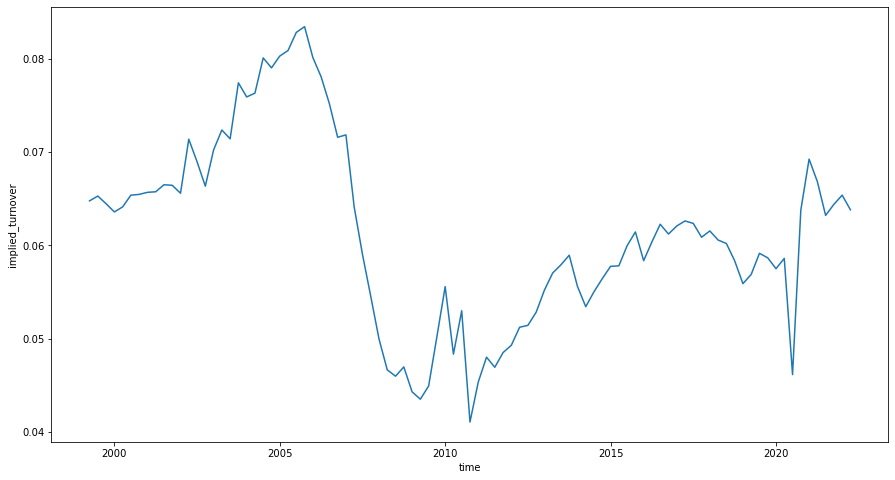

In [92]:
# Now let's plot the implied turnover from 1999 to the present:


sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

In [93]:
# now it is time to look at the HPU info

HPI = pd.read_csv('./HPI_Case_Shiller.csv')
print(HPI.info())
HPI.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          412 non-null    object 
 1   PresentHPI    412 non-null    float64
 2   LastYearsHPI  412 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.8+ KB
None


,DATE,PresentHPI,LastYearsHPI
0,1988-01-01,68.859,63.965
1,1988-02-01,69.263,64.424
2,1988-03-01,69.639,64.735
3,1988-04-01,69.977,65.132
4,1988-05-01,70.426,65.565
5,1988-06-01,70.888,66.073
6,1988-07-01,71.354,66.508
7,1988-08-01,71.799,66.939
8,1988-09-01,72.240,67.331
9,1988-10-01,72.636,67.739


In [94]:
# Now, let's convert the date to date.time 

HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.8 KB


In [95]:
# Now let's make month and year columns

HPI["Month"] = pd.to_datetime(HPI['DATE']).dt.month
HPI["Year"] = pd.to_datetime(HPI['DATE']).dt.year
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
 3   Month         412 non-null    int64         
 4   Year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 16.2 KB


In [96]:
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year
0,1988-01-01,68.859,63.965,1,1988
1,1988-02-01,69.263,64.424,2,1988
2,1988-03-01,69.639,64.735,3,1988
3,1988-04-01,69.977,65.132,4,1988
4,1988-05-01,70.426,65.565,5,1988
...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021
408,2022-01-01,284.767,238.772,1,2022
409,2022-02-01,290.433,241.888,2,2022
410,2022-03-01,296.572,245.847,3,2022


In [97]:
#Now let's calculate the Year over Year percent change for HPI

HPI['YoYChange'] = HPI['PresentHPI']/HPI['LastYearsHPI'] - 1
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange
0,1988-01-01,68.859,63.965,1,1988,0.076511
1,1988-02-01,69.263,64.424,2,1988,0.075112
2,1988-03-01,69.639,64.735,3,1988,0.075755
3,1988-04-01,69.977,65.132,4,1988,0.074387
4,1988-05-01,70.426,65.565,5,1988,0.074140
...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808
408,2022-01-01,284.767,238.772,1,2022,0.192631
409,2022-02-01,290.433,241.888,2,2022,0.200692
410,2022-03-01,296.572,245.847,3,2022,0.206328


In [98]:
# Now, let's make a time quantity so that we have a way to plot the time series:

HPI['time'] = HPI['Year'] + HPI['Month']/12
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange,time
0,1988-01-01,68.859,63.965,1,1988,0.076511,1988.083333
1,1988-02-01,69.263,64.424,2,1988,0.075112,1988.166667
2,1988-03-01,69.639,64.735,3,1988,0.075755,1988.250000
3,1988-04-01,69.977,65.132,4,1988,0.074387,1988.333333
4,1988-05-01,70.426,65.565,5,1988,0.074140,1988.416667
...,...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808,2022.000000
408,2022-01-01,284.767,238.772,1,2022,0.192631,2022.083333
409,2022-02-01,290.433,241.888,2,2022,0.200692,2022.166667
410,2022-03-01,296.572,245.847,3,2022,0.206328,2022.250000


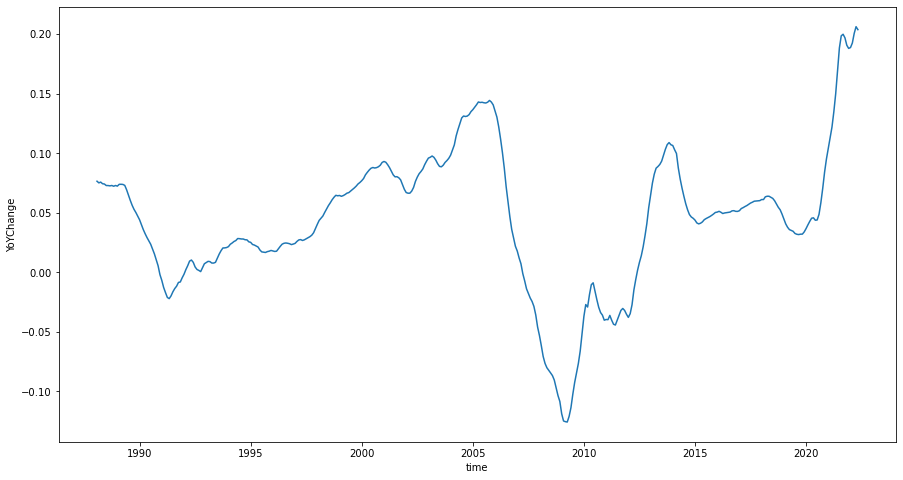

In [99]:
#This is a plot of the YoY HPI percent change from 1988-present, using Case Shiller

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
plt.gcf().set_size_inches(15, 8)

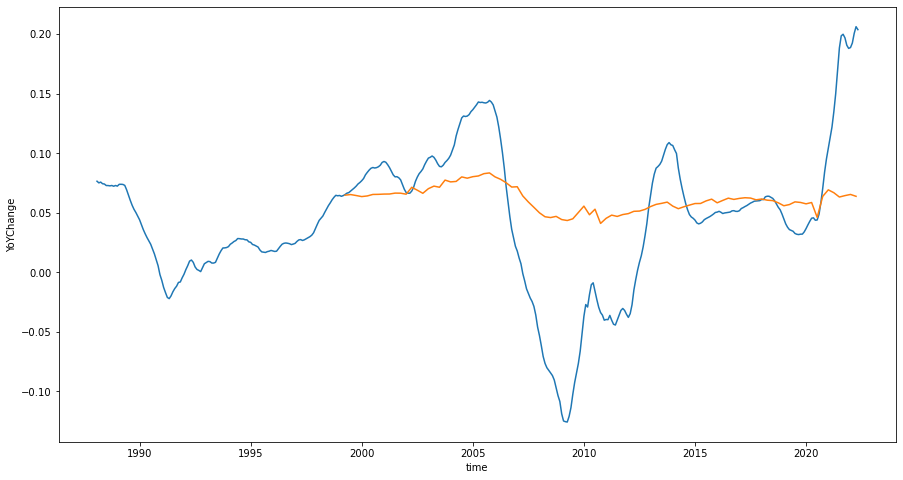

In [100]:
#Below plots the YoY  HPI change in blue from 1988-present using Case Shiller
#the orange plots the implied turnover from 1999-present

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

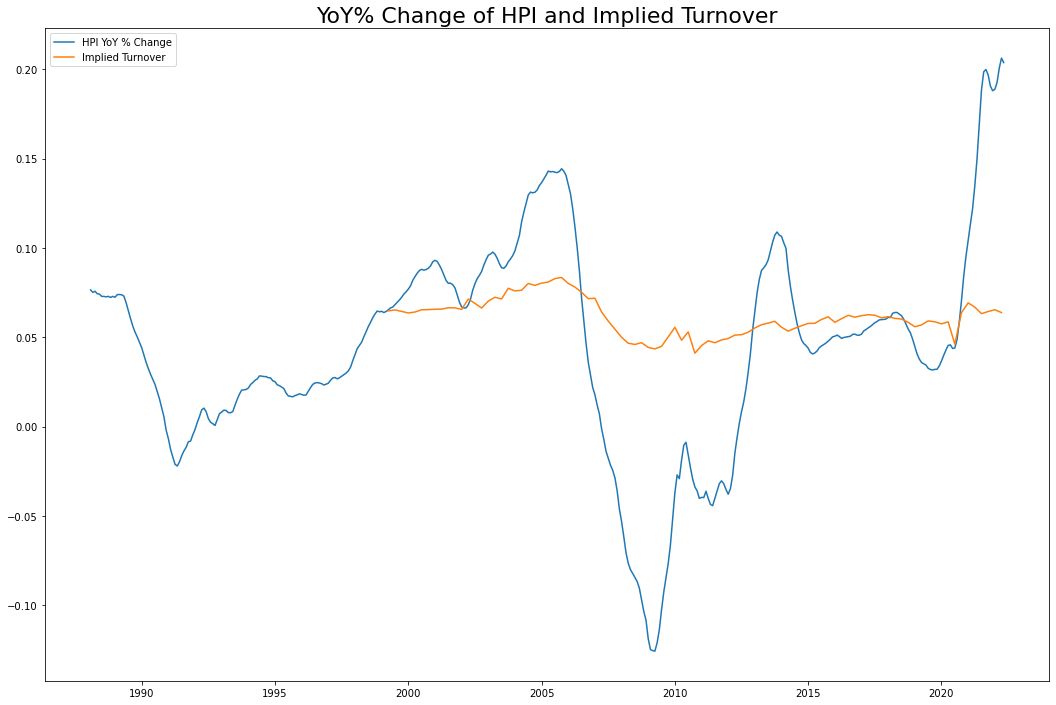

In [101]:
#Here I just play around with different plotting methods. 
#This is the same plot as above but it features a title and a legend

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY % Change")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("YoY% Change of HPI and Implied Turnover", size = 22)
plt.legend();

# Now I am going to make the same graphs, except  instead of using HPI from Case - Shiller, I will use the Purchase Only data

In [102]:
# Now let's do the same plots using HPI from Purchase Only:

HPI_PO = pd.read_csv('./HPI_Purchase_only.csv')
print(HPI_PO.info())
HPI_PO.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       121 non-null    int64  
 1   Quarter                                                    121 non-null    int64  
 2   Not Seasonally-Adjusted
Purchase-Only Index 
(1991Q1=100)  121 non-null    float64
 3   Seasonally-Adjusted Purchase-Only Index 
(1991Q1=100)      121 non-null    float64
 4   YoYChange_not_seasonally_adjusted                          121 non-null    object 
 5   YoYChange_seasonally_adjusted                              121 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 5.8+ KB
None


,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted
0,1992,1,102.26,102.28,2.26%,2.28%
1,1992,2,102.66,102.13,2.14%,2.13%
2,1992,3,103.67,102.99,2.83%,2.80%
3,1992,4,104.19,103.80,2.68%,2.70%
4,1993,1,103.81,103.85,1.51%,1.54%
5,1993,2,105.44,104.88,2.71%,2.69%
6,1993,3,106.43,105.68,2.66%,2.61%
7,1993,4,107.02,106.67,2.72%,2.77%
8,1994,1,107.58,107.65,3.63%,3.66%
9,1994,2,109.14,108.52,3.51%,3.48%


In [103]:
# I want to get rid of the percentage signs in the last two columns

HPI_PO['YoYChange_not_seasonally_adjusted'] = HPI_PO['YoYChange_not_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO['YoYChange_seasonally_adjusted'] = HPI_PO['YoYChange_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO

,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted
0,1992,1,102.26,102.28,0.0226,0.0228
1,1992,2,102.66,102.13,0.0214,0.0213
2,1992,3,103.67,102.99,0.0283,0.0280
3,1992,4,104.19,103.80,0.0268,0.0270
4,1993,1,103.81,103.85,0.0151,0.0154
...,...,...,...,...,...,...
116,2021,1,315.40,315.89,0.1312,0.1306
117,2021,2,336.16,332.15,0.1774,0.1777
118,2021,3,349.88,346.25,0.1859,0.1859
119,2021,4,358.25,358.63,0.1770,0.1770


In [104]:
# Now let's make a time parameter for plotting the time series:

HPI_PO['time'] = HPI_PO['Year'] + HPI_PO['Quarter']/4
HPI_PO

,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted,time
0,1992,1,102.26,102.28,0.0226,0.0228,1992.25
1,1992,2,102.66,102.13,0.0214,0.0213,1992.50
2,1992,3,103.67,102.99,0.0283,0.0280,1992.75
3,1992,4,104.19,103.80,0.0268,0.0270,1993.00
4,1993,1,103.81,103.85,0.0151,0.0154,1993.25
...,...,...,...,...,...,...,...
116,2021,1,315.40,315.89,0.1312,0.1306,2021.25
117,2021,2,336.16,332.15,0.1774,0.1777,2021.50
118,2021,3,349.88,346.25,0.1859,0.1859,2021.75
119,2021,4,358.25,358.63,0.1770,0.1770,2022.00


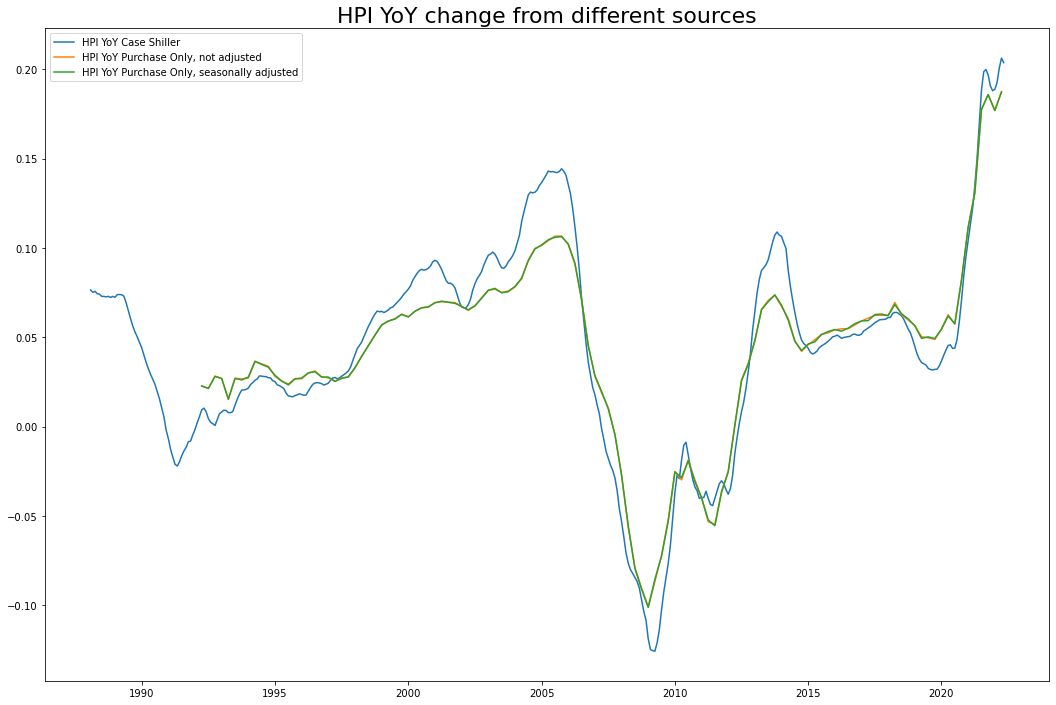

In [105]:
#Now, let's plot three different measures of HPI YoY % Change:

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

In [106]:
#Now let's look at the HPI from the Fred source

HPI_FHFA = pd.read_csv('./HPI_Fred.csv')
print(HPI_FHFA.info())
HPI_FHFA.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          185 non-null    object 
 1   HPI           185 non-null    float64
 2   Previous_HPI  185 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.5+ KB
None


,DATE,HPI,Previous_HPI
0,1976-01-01,62.86,60.02
1,1976-04-01,65.45,60.96
2,1976-07-01,66.53,61.16
3,1976-10-01,67.26,62.22
4,1977-01-01,69.49,62.86
5,1977-04-01,72.72,65.45
6,1977-07-01,74.34,66.53
7,1977-10-01,77.19,67.26
8,1978-01-01,79.58,69.49
9,1978-04-01,82.74,72.72


In [107]:
#Let's change the date to .datetime
#LEt's make a year and a month and a time column
#Also, let's make YoY HPI % change

HPI_FHFA['DATE'] = pd.to_datetime(HPI_FHFA['DATE'])
HPI_FHFA["Month"] = pd.to_datetime(HPI_FHFA['DATE']).dt.month
HPI_FHFA["Year"] = pd.to_datetime(HPI_FHFA['DATE']).dt.year
HPI_FHFA["time"] = HPI_FHFA["Year"] + HPI_FHFA["Month"]/12
HPI_FHFA["YoY"] = HPI_FHFA["HPI"]/HPI_FHFA["Previous_HPI"] -1
HPI_FHFA

,DATE,HPI,Previous_HPI,Month,Year,time,YoY
0,1976-01-01,62.86,60.02,1,1976,1976.083333,0.047318
1,1976-04-01,65.45,60.96,4,1976,1976.333333,0.073655
2,1976-07-01,66.53,61.16,7,1976,1976.583333,0.087802
3,1976-10-01,67.26,62.22,10,1976,1976.833333,0.081003
4,1977-01-01,69.49,62.86,1,1977,1977.083333,0.105472
...,...,...,...,...,...,...,...
180,2021-01-01,484.29,450.42,1,2021,2021.083333,0.075196
181,2021-04-01,511.22,454.83,4,2021,2021.333333,0.123980
182,2021-07-01,539.60,462.80,7,2021,2021.583333,0.165946
183,2021-10-01,557.93,473.02,10,2021,2021.833333,0.179506


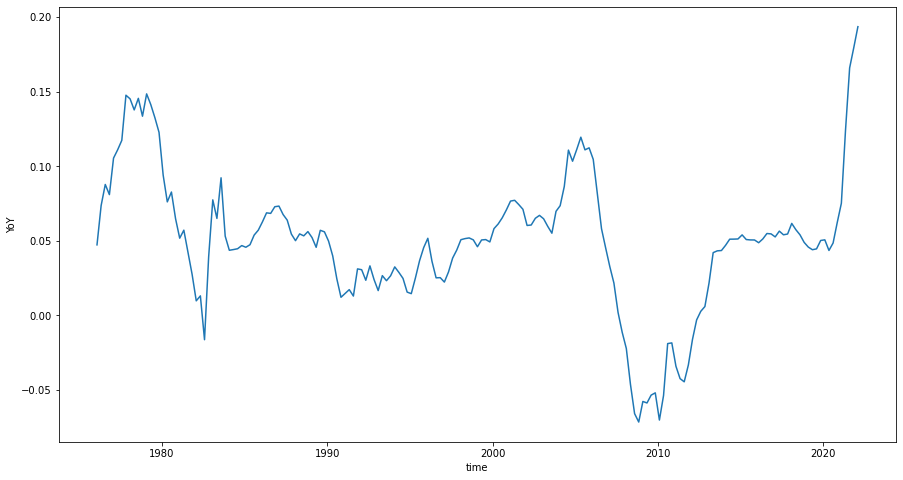

In [108]:
# Now, let's plot YoY for the Fred data

sns.lineplot(x = "time", y = "YoY",
             data = HPI_FHFA)
plt.gcf().set_size_inches(15, 8)

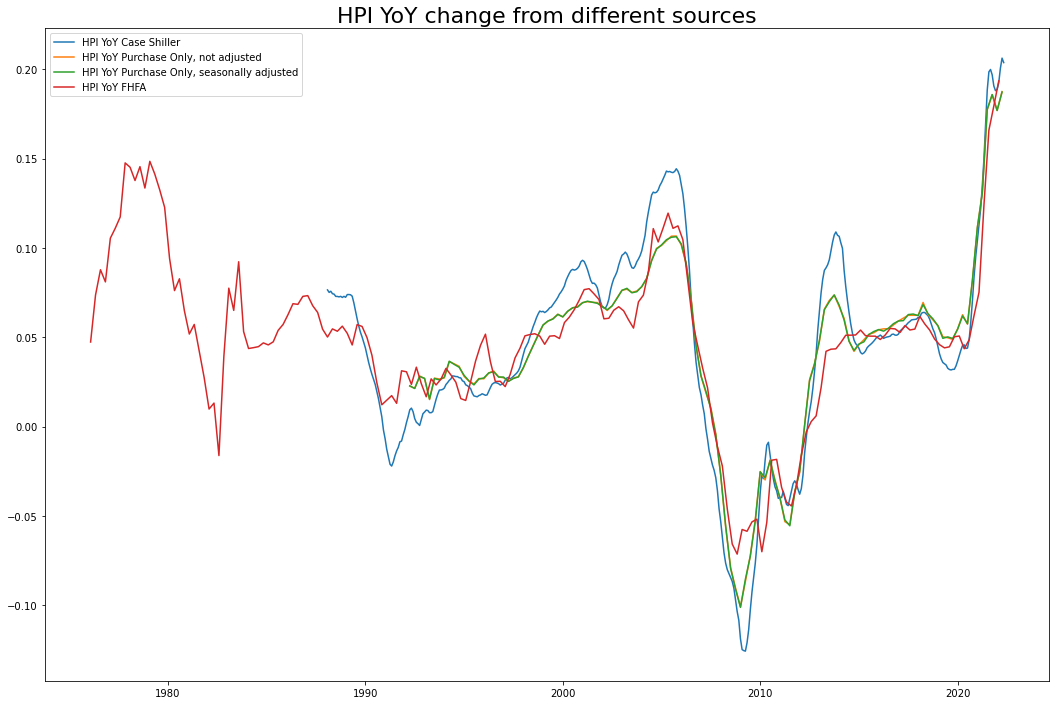

In [109]:
# Now let's plot all four HPI YoY % time series graphs

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

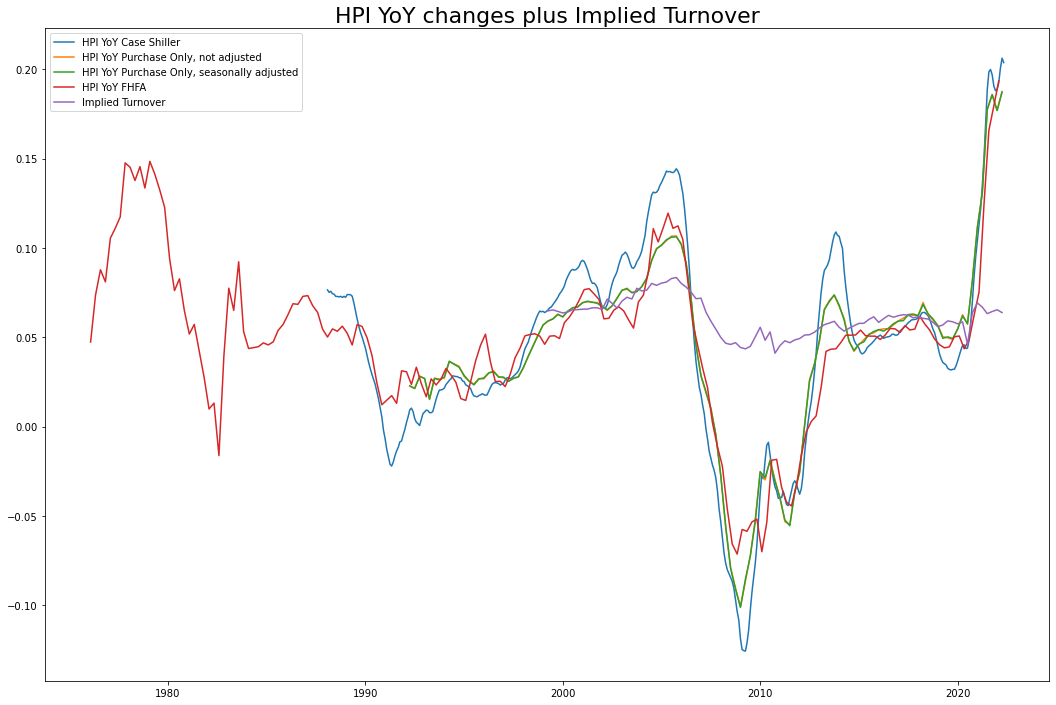

In [110]:
# Now let's plot all four HPI YoY % time series graphs Plus the implied turnover

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [111]:
# There is one more data set from which to grab HPI data:

HPI_FHFA_PO = pd.read_csv('./HPI_FHFA_Purchase_Only.csv')
print(HPI_FHFA_PO.info())
HPI_FHFA_PO.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            364 non-null    object 
 1   HPI             364 non-null    float64
 2   Last_Years_HPI  364 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB
None


,DATE,HPI,Last_Years_HPI
0,1992-01-01,102.24,100.00
1,1992-02-01,102.97,100.46
2,1992-03-01,102.81,100.47
3,1992-04-01,102.57,100.34
4,1992-05-01,102.60,100.39
5,1992-06-01,102.54,100.52
6,1992-07-01,102.88,100.56
7,1992-08-01,103.33,100.39
8,1992-09-01,103.73,100.62
9,1992-10-01,104.05,100.94


In [112]:
# Now we convert to datetime, add month, year, time, and HPI YoY change:

HPI_FHFA_PO['DATE'] = pd.to_datetime(HPI_FHFA_PO['DATE'])
HPI_FHFA_PO["Month"] = pd.to_datetime(HPI_FHFA_PO['DATE']).dt.month
HPI_FHFA_PO["Year"] = pd.to_datetime(HPI_FHFA_PO['DATE']).dt.year
HPI_FHFA_PO['time'] =HPI_FHFA_PO['Year'] + HPI_FHFA_PO['Month']/12
HPI_FHFA_PO['HPI_YoY_Change'] = HPI_FHFA_PO['HPI']/HPI_FHFA_PO['Last_Years_HPI'] -1
HPI_FHFA_PO

,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014
...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022


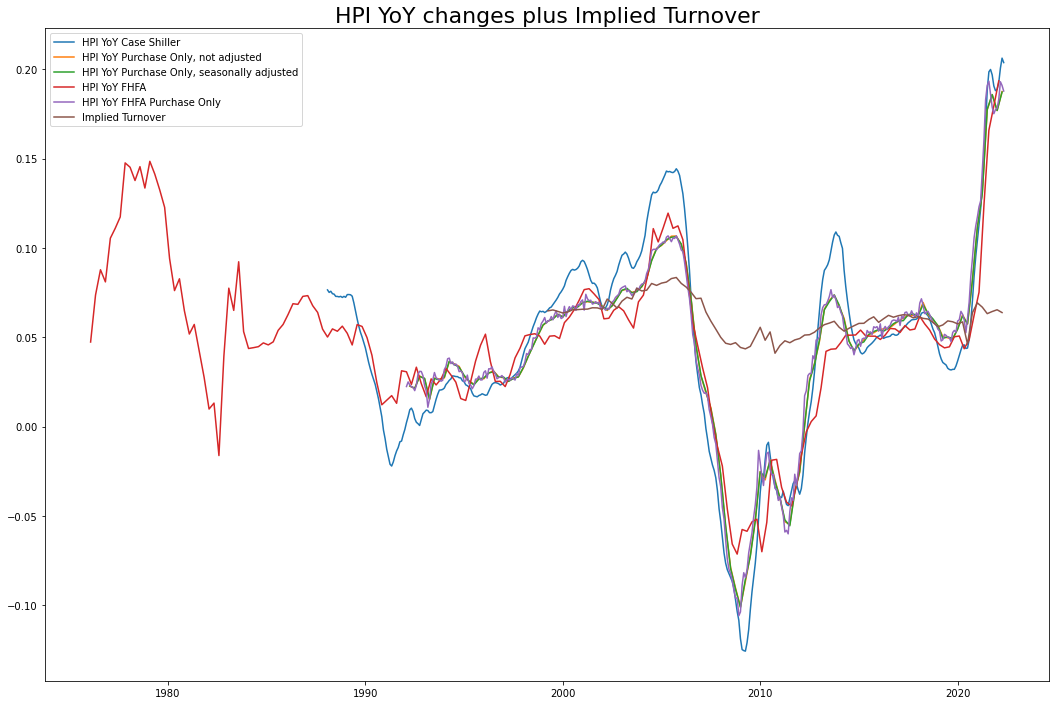

In [113]:
#Now, let's graph the time series for HPI YoY % change determined by FHFA Purchase only data

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY FHFA Purchase Only")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

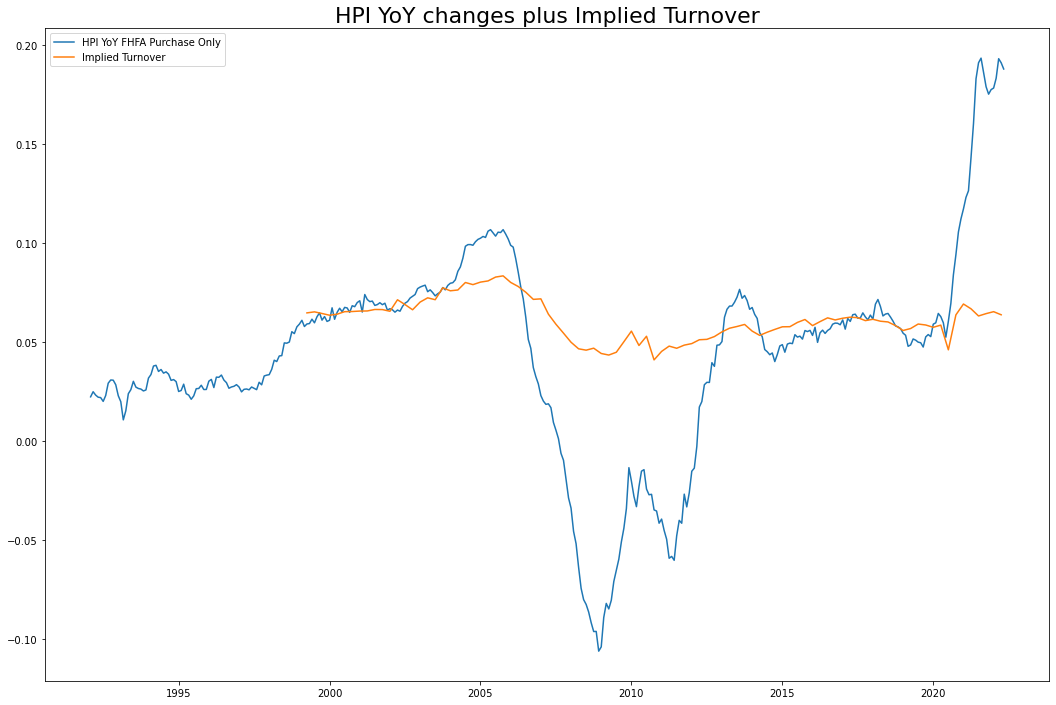

In [114]:
#Moving forward, we will use the FHFA Purchase only HPI  and we will look at the implied turnover there:

plt.figure(figsize=(18,12))
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY FHFA Purchase Only")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [115]:
# We want to take a moving average of the HPI YoY % change for the FHFA PO data

HPI_FHFA_PO

,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014
...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022


In [116]:
#Make a column of zeros. This will serve as the three month average quantity

HPI_FHFA_PO['HPI_YoY_3mo'] = 0

In [117]:
#Make the 3 month average quantity

for i in range(2,364):
    HPI_FHFA_PO['HPI_YoY_3mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i] + 
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1] + 
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2])/3

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/3562730025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_3mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i] +


In [118]:
#Make the 4 month average quantity

HPI_FHFA_PO['HPI_YoY_4mo'] = 0
for i in range(3,364):
    HPI_FHFA_PO['HPI_YoY_4mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3])/4
HPI_FHFA_PO

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/159780871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_4mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+


,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400,0.000000,0.000000
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985,0.000000,0.000000
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291,0.023559,0.000000
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224,0.023500,0.023225
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014,0.022510,0.023129
...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406


In [119]:
#Make the 5 month average quantity

HPI_FHFA_PO['HPI_YoY_5mo'] = 0
for i in range(4,364):
    HPI_FHFA_PO['HPI_YoY_5mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4])/5
HPI_FHFA_PO

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/706315762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_5mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+


,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400,0.000000,0.000000,0.000000
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985,0.000000,0.000000,0.000000
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291,0.023559,0.000000,0.000000
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224,0.023500,0.023225,0.000000
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014,0.022510,0.023129,0.022983
...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624


In [120]:
#Make the 6 month average quantity

HPI_FHFA_PO['HPI_YoY_6mo'] = 0
for i in range(5,364):
    HPI_FHFA_PO['HPI_YoY_6mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-5])/6
HPI_FHFA_PO

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/551530952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_6mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+


,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400,0.000000,0.000000,0.000000,0.000000
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985,0.000000,0.000000,0.000000,0.000000
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291,0.023559,0.000000,0.000000,0.000000
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224,0.023500,0.023225,0.000000,0.000000
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014,0.022510,0.023129,0.022983,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624,0.183052


In [121]:
#Make the 7 month average quantity

HPI_FHFA_PO['HPI_YoY_7mo'] = 0
for i in range(6,364):
    HPI_FHFA_PO['HPI_YoY_7mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-5]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-6])/7
HPI_FHFA_PO

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/116952898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_7mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+


,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo,HPI_YoY_7mo
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985,0.000000,0.000000,0.000000,0.000000,0.000000
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291,0.023559,0.000000,0.000000,0.000000,0.000000
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224,0.023500,0.023225,0.000000,0.000000,0.000000
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014,0.022510,0.023129,0.022983,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560,0.182915
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867,0.181797
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036,0.181757
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624,0.183052,0.182463


In [122]:
#Make the 2 month average quantity

HPI_FHFA_PO['HPI_YoY_2mo'] = 0
for i in range(1,364):
    HPI_FHFA_PO['HPI_YoY_2mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1])/2
HPI_FHFA_PO

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_34658/4146452806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPI_FHFA_PO['HPI_YoY_2mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+


,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo,HPI_YoY_7mo,HPI_YoY_2mo
0,1992-01-01,102.24,100.00,1,1992,1992.083333,0.022400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992-02-01,102.97,100.46,2,1992,1992.166667,0.024985,0.000000,0.000000,0.000000,0.000000,0.000000,0.023693
2,1992-03-01,102.81,100.47,3,1992,1992.250000,0.023291,0.023559,0.000000,0.000000,0.000000,0.000000,0.024138
3,1992-04-01,102.57,100.34,4,1992,1992.333333,0.022224,0.023500,0.023225,0.000000,0.000000,0.000000,0.022757
4,1992-05-01,102.60,100.39,5,1992,1992.416667,0.022014,0.022510,0.023129,0.022983,0.000000,0.000000,0.022119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560,0.182915,0.177892
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867,0.181797,0.180753
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036,0.181757,0.188158
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624,0.183052,0.182463,0.192059


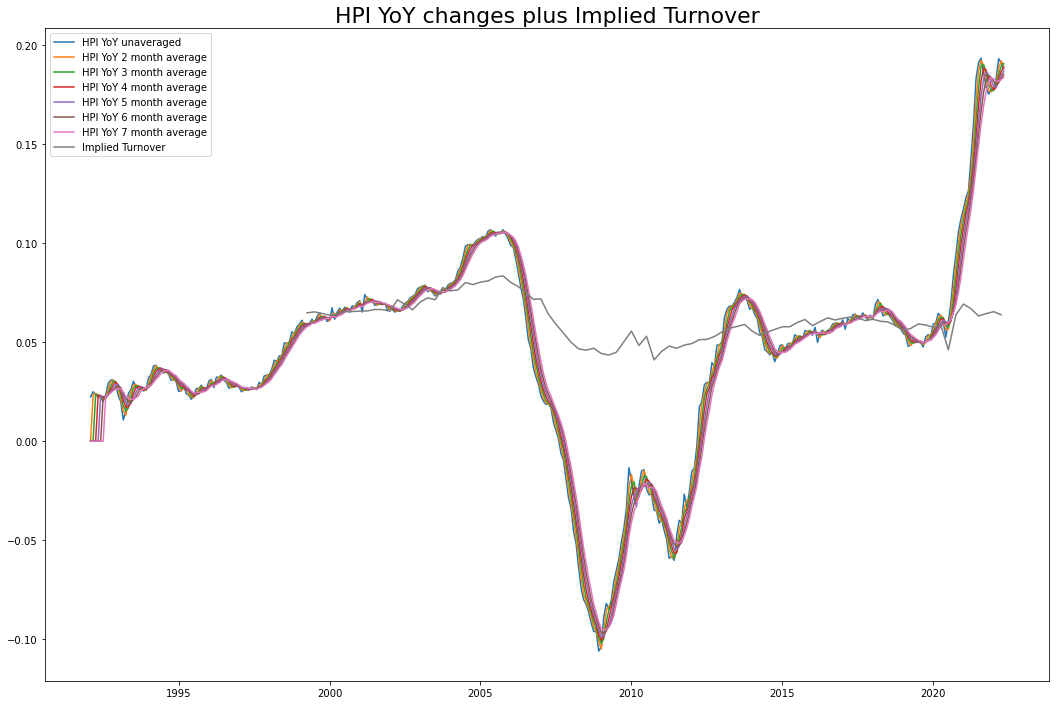

In [123]:
#Let's plot the moving averages!
#There is a lot here. not much difference between a 3 momnth average and a 7 month average

plt.figure(figsize=(18,12))
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY unaveraged")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_2mo, label = "HPI YoY 2 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_3mo, label = "HPI YoY 3 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_4mo, label = "HPI YoY 4 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_5mo, label = "HPI YoY 5 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_6mo, label = "HPI YoY 6 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_7mo, label = "HPI YoY 7 month average")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [124]:
# Now it's time to try to find a linear relationship between the moving average and implied turnover
#Let's look at how to put them into the same data frame

print(HPI_FHFA_PO)
StockQuarterly

          DATE     HPI  Last_Years_HPI  Month  Year         time  \
0   1992-01-01  102.24          100.00      1  1992  1992.083333   
1   1992-02-01  102.97          100.46      2  1992  1992.166667   
2   1992-03-01  102.81          100.47      3  1992  1992.250000   
3   1992-04-01  102.57          100.34      4  1992  1992.333333   
4   1992-05-01  102.60          100.39      5  1992  1992.416667   
..         ...     ...             ...    ...   ...          ...   
359 2021-12-01  367.92          312.25     12  2021  2022.000000   
360 2022-01-01  373.85          315.96      1  2022  2022.083333   
361 2022-02-01  380.86          319.22      2  2022  2022.166667   
362 2022-03-01  386.82          324.78      3  2022  2022.250000   
363 2022-04-01  392.86          330.72      4  2022  2022.333333   

     HPI_YoY_Change  HPI_YoY_3mo  HPI_YoY_4mo  HPI_YoY_5mo  HPI_YoY_6mo  \
0          0.022400     0.000000     0.000000     0.000000     0.000000   
1          0.024985     0.000000 

,Year,Quarter,Practical_Stock,Quarterly_home_sales,implied_turnover,time
0,1999,1,79655,5.160000,0.064779,1999.25
1,1999,2,80146,5.233333,0.065297,1999.50
2,1999,3,80656,5.200000,0.064471,1999.75
3,1999,4,80094,5.093333,0.063592,2000.00
4,2000,1,80776,5.180000,0.064128,2000.25
...,...,...,...,...,...,...
88,2021,1,94048,6.286667,0.066845,2021.25
89,2021,2,94117,5.950000,0.063219,2021.50
90,2021,3,94192,6.066667,0.064407,2021.75
91,2021,4,94865,6.203333,0.065391,2022.00


In [125]:
#I see that we will have to truncate convert the HPI data as well as take the average over quarters:
#First, truncate anything below 1998

HPI_FHFA_PO.drop(HPI_FHFA_PO.index[(HPI_FHFA_PO["Year"] <= 1998)],axis=0,inplace=True)
HPI_FHFA_PO

,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo,HPI_YoY_7mo,HPI_YoY_2mo
84,1999-01-01,128.47,121.08,1,1999,1999.083333,0.061034,0.059289,0.058049,0.057494,0.056256,0.055289,0.060073
85,1999-02-01,128.99,121.93,2,1999,1999.166667,0.057902,0.059349,0.058943,0.058019,0.057562,0.056491,0.059468
86,1999-03-01,129.57,122.33,3,1999,1999.250000,0.059184,0.059373,0.059308,0.058991,0.058214,0.057794,0.058543
87,1999-04-01,130.20,122.90,4,1999,1999.333333,0.059398,0.058828,0.059380,0.059326,0.059059,0.058383,0.059291
88,1999-05-01,130.97,123.37,5,1999,1999.416667,0.061603,0.060062,0.059522,0.059824,0.059705,0.059422,0.060501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560,0.182915,0.177892
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867,0.181797,0.180753
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036,0.181757,0.188158
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624,0.183052,0.182463,0.192059


In [126]:
#Let's add a column to HPI_FHFA_PO describing the quarter:
HPI_FHFA_PO['Q'] = np.ceil(HPI_FHFA_PO['Month']/3)
HPI_FHFA_PO

,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo,HPI_YoY_7mo,HPI_YoY_2mo,Q
84,1999-01-01,128.47,121.08,1,1999,1999.083333,0.061034,0.059289,0.058049,0.057494,0.056256,0.055289,0.060073,1.0
85,1999-02-01,128.99,121.93,2,1999,1999.166667,0.057902,0.059349,0.058943,0.058019,0.057562,0.056491,0.059468,1.0
86,1999-03-01,129.57,122.33,3,1999,1999.250000,0.059184,0.059373,0.059308,0.058991,0.058214,0.057794,0.058543,1.0
87,1999-04-01,130.20,122.90,4,1999,1999.333333,0.059398,0.058828,0.059380,0.059326,0.059059,0.058383,0.059291,2.0
88,1999-05-01,130.97,123.37,5,1999,1999.416667,0.061603,0.060062,0.059522,0.059824,0.059705,0.059422,0.060501,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560,0.182915,0.177892,4.0
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867,0.181797,0.180753,1.0
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036,0.181757,0.188158,1.0
362,2022-03-01,386.82,324.78,3,2022,2022.250000,0.191022,0.189112,0.186406,0.184624,0.183052,0.182463,0.192059,1.0


In [127]:
#Additionally, let's toss the month of April 2022 because it is not accounted for in the quarterly data:

HPI_FHFA_PO = HPI_FHFA_PO.drop(labels=[363], axis=0)
HPI_FHFA_PO

,DATE,HPI,Last_Years_HPI,Month,Year,time,HPI_YoY_Change,HPI_YoY_3mo,HPI_YoY_4mo,HPI_YoY_5mo,HPI_YoY_6mo,HPI_YoY_7mo,HPI_YoY_2mo,Q
84,1999-01-01,128.47,121.08,1,1999,1999.083333,0.061034,0.059289,0.058049,0.057494,0.056256,0.055289,0.060073,1.0
85,1999-02-01,128.99,121.93,2,1999,1999.166667,0.057902,0.059349,0.058943,0.058019,0.057562,0.056491,0.059468,1.0
86,1999-03-01,129.57,122.33,3,1999,1999.250000,0.059184,0.059373,0.059308,0.058991,0.058214,0.057794,0.058543,1.0
87,1999-04-01,130.20,122.90,4,1999,1999.333333,0.059398,0.058828,0.059380,0.059326,0.059059,0.058383,0.059291,2.0
88,1999-05-01,130.97,123.37,5,1999,1999.416667,0.061603,0.060062,0.059522,0.059824,0.059705,0.059422,0.060501,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-11-01,362.94,308.23,11,2021,2021.916667,0.177497,0.177205,0.179424,0.182215,0.183687,0.183586,0.176345,4.0
359,2021-12-01,367.92,312.25,12,2021,2022.000000,0.178287,0.176992,0.177476,0.179196,0.181560,0.182915,0.177892,4.0
360,2022-01-01,373.85,315.96,1,2022,2022.083333,0.183219,0.179668,0.178549,0.178624,0.179867,0.181797,0.180753,1.0
361,2022-02-01,380.86,319.22,2,2022,2022.166667,0.193096,0.184867,0.183025,0.181459,0.181036,0.181757,0.188158,1.0


In [128]:
#Now, add to the fimplied turnover data the weighted average HPI YoY change
StockQuarterly['HPI_YoY_3mo'] = HPI_FHFA_PO.groupby(['Year', 'Q']).mean()['HPI_YoY_3mo'].tolist()

In [129]:
#Check that it worked

StockQuarterly

,Year,Quarter,Practical_Stock,Quarterly_home_sales,implied_turnover,time,HPI_YoY_3mo
0,1999,1,79655,5.160000,0.064779,1999.25,0.059337
1,1999,2,80146,5.233333,0.065297,1999.50,0.059714
2,1999,3,80656,5.200000,0.064471,1999.75,0.062254
3,1999,4,80094,5.093333,0.063592,2000.00,0.061980
4,2000,1,80776,5.180000,0.064128,2000.25,0.063639
...,...,...,...,...,...,...,...
88,2021,1,94048,6.286667,0.066845,2021.25,0.123527
89,2021,2,94117,5.950000,0.063219,2021.50,0.161195
90,2021,3,94192,6.066667,0.064407,2021.75,0.188477
91,2021,4,94865,6.203333,0.065391,2022.00,0.178088


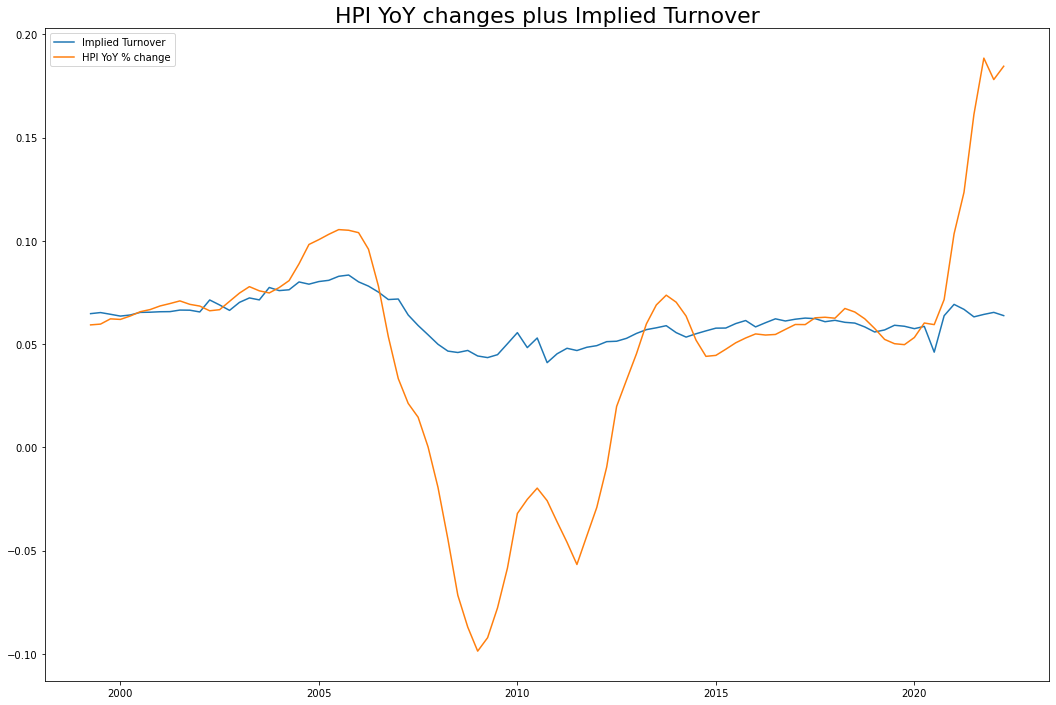

In [130]:
plt.figure(figsize=(18,12))
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.plot(StockQuarterly.time, StockQuarterly.HPI_YoY_3mo, label = "HPI YoY % change")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

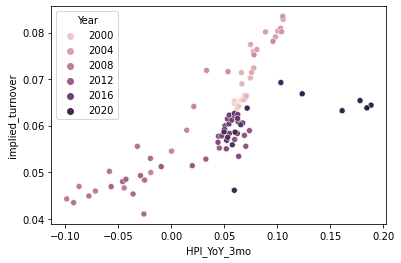

In [139]:
# Now, let's make a scatter plot in which each point is a quarter, and 
#we will plot the implied turnover versus the HPI % change

sns.scatterplot(data=StockQuarterly, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

In [132]:
lm = sm.OLS.from_formula('implied_turnover ~ HPI_YoY_3mo', StockQuarterly)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       implied_turnover   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     105.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           6.66e-17
Time:                        10:08:28   Log-Likelihood:                 332.26
No. Observations:                  93   AIC:                            -660.5
Df Residuals:                      91   BIC:                            -655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0552      0.001     59.434      0.000       0.053       0.057
HPI_YoY_3mo     0.1289      0.013     10.280      0.000       0.104       0.154
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.326
Skew:                           0.145   Prob(JB):                        0.850
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

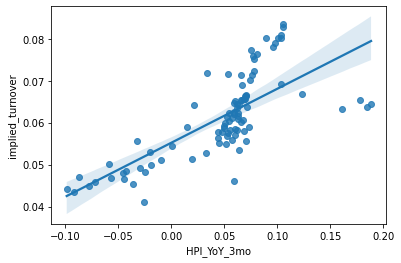

In [133]:
sns.regplot(StockQuarterly['HPI_YoY_3mo'], StockQuarterly['implied_turnover'])

In [134]:
StockQuarterly['adjusted'] = np.log(1+3*StockQuarterly['implied_turnover']-.18)

In [135]:
StockQuarterly

,Year,Quarter,Practical_Stock,Quarterly_home_sales,implied_turnover,time,HPI_YoY_3mo,adjusted
0,1999,1,79655,5.160000,0.064779,1999.25,0.059337,0.014236
1,1999,2,80146,5.233333,0.065297,1999.50,0.059714,0.015768
2,1999,3,80656,5.200000,0.064471,1999.75,0.062254,0.013325
3,1999,4,80094,5.093333,0.063592,2000.00,0.061980,0.010718
4,2000,1,80776,5.180000,0.064128,2000.25,0.063639,0.012308
...,...,...,...,...,...,...,...,...
88,2021,1,94048,6.286667,0.066845,2021.25,0.123527,0.020328
89,2021,2,94117,5.950000,0.063219,2021.50,0.161195,0.009611
90,2021,3,94192,6.066667,0.064407,2021.75,0.188477,0.013136
91,2021,4,94865,6.203333,0.065391,2022.00,0.178088,0.016044


/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='adjusted'>

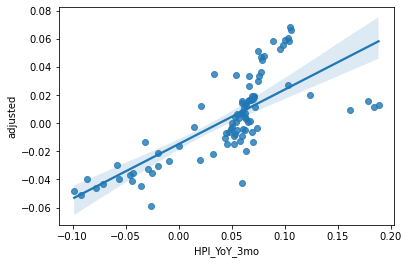

In [136]:
sns.regplot(StockQuarterly['HPI_YoY_3mo'], StockQuarterly['adjusted'])

In [137]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', StockQuarterly)
result = logmodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               adjusted   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.59e-17
Time:                        10:08:31   Log-Likelihood:                 231.63
No. Observations:                  93   AIC:                            -459.3
Df Residuals:                      91   BIC:                            -454.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0148      0.003     -5.411      0.000      -0.020      -0.009
HPI_YoY_3mo     0.3875      0.037     10.476      0.000       0.314       0.461
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.095
Skew:                           0.078   Prob(JB):                        0.953
Kurtosis:                       3.017   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

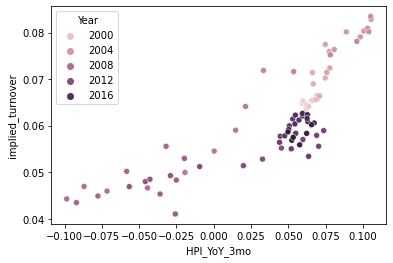

In [146]:
#Let's make a new data frame from StockQuarterly

TurnoverHPA_pre2020 = StockQuarterly.drop(StockQuarterly.index[(StockQuarterly["Year"] >= 2020)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

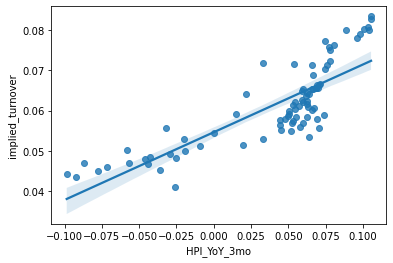

In [156]:
sns.regplot(TurnoverHPA_pre2020['HPI_YoY_3mo'], TurnoverHPA_pre2020['implied_turnover'])

In [148]:
lm = sm.OLS.from_formula('implied_turnover ~ HPI_YoY_3mo', TurnoverHPA_pre2020)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       implied_turnover   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.74e-22
Time:                        10:59:43   Log-Likelihood:                 314.21
No. Observations:                  84   AIC:                            -624.4
Df Residuals:                      82   BIC:                            -619.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0546      0.001     68.123      0.000       0.053       0.056
HPI_YoY_3mo     0.1685      0.013     13.471      0.000       0.144       0.193
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.816
Skew:                           0.196   Prob(JB):                        0.245
Kurtosis:                       2.193   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

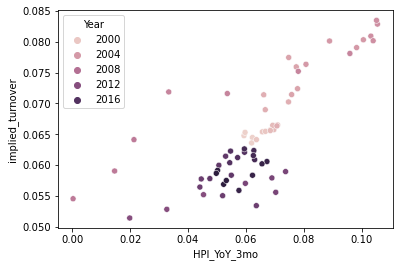

In [152]:
TurnoverHPA_pre2020_no_neg = TurnoverHPA_pre2020.drop(TurnoverHPA_pre2020.index[(TurnoverHPA_pre2020["HPI_YoY_3mo"] <= 0)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020_no_neg, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

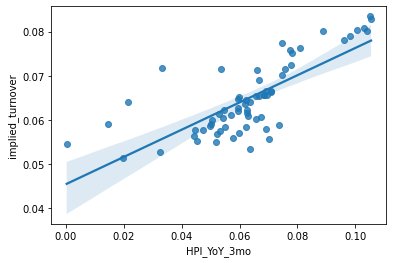

In [157]:
sns.regplot(TurnoverHPA_pre2020_no_neg['HPI_YoY_3mo'], TurnoverHPA_pre2020_no_neg['implied_turnover'])

In [153]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', TurnoverHPA_pre2020_no_neg)
result = logmodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               adjusted   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     87.17
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.47e-13
Time:                        12:47:21   Log-Likelihood:                 180.03
No. Observations:                  66   AIC:                            -356.1
Df Residuals:                      64   BIC:                            -351.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0427      0.006     -6.649      0.000      -0.056      -0.030
HPI_YoY_3mo     0.9042      0.097      9.336      0.000       0.711       1.098
==============================================================================
Omnibus:                        3.107   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.251
Skew:                           0.387   Prob(JB):                        0.325
Kurtosis:                       3.467   Cond. No.                         49.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

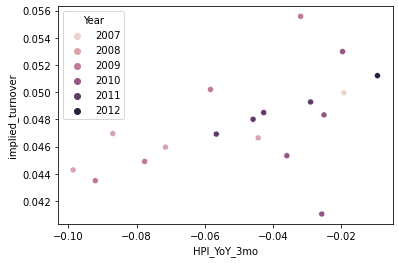

In [151]:
TurnoverHPA_pre2020_no_pos = TurnoverHPA_pre2020.drop(TurnoverHPA_pre2020.index[(TurnoverHPA_pre2020["HPI_YoY_3mo"] >= 0)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020_no_pos, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HPI_YoY_3mo', ylabel='implied_turnover'>

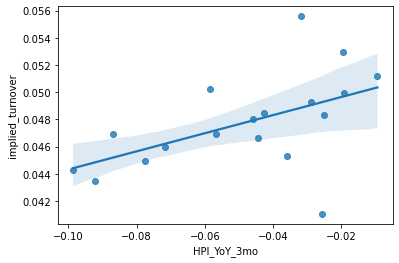

In [158]:
sns.regplot(TurnoverHPA_pre2020_no_pos['HPI_YoY_3mo'], TurnoverHPA_pre2020_no_pos['implied_turnover'])

In [154]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', TurnoverHPA_pre2020_no_pos)
result = logmodel.fit()
result.summary()

/Users/leonardodigiosia/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               adjusted   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     5.776
Date:                Wed, 20 Jul 2022   Prob (F-statistic):             0.0287
Time:                        12:47:31   Log-Likelihood:                 59.061
No. Observations:                  18   AIC:                            -114.1
Df Residuals:                      16   BIC:                            -112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0275      0.005     -5.789      0.000      -0.038      -0.017
HPI_YoY_3mo     0.2068      0.086      2.403      0.029       0.024       0.389
==============================================================================
Omnibus:                        6.714   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.904
Skew:                          -0.533   Prob(JB):                       0.0861
Kurtosis:                       5.325   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""